In [1]:
#利用python处理脑电数据
#导入数据-->带通滤波-->计算可视化PSD

In [92]:
import mne
import numpy as np
import matplotlib.pyplot as plt

In [154]:
#load data
homepath = 'D:/data/EEG/jqx/'
filename = 'p1.cnt'
filepath = homepath + filename
montage = mne.channels.read_montage('standard_1020')
eog = ['HEOG','VEOG'] #set EOG channels
raw = mne.io.read_raw_cnt(filepath,montage, eog=eog, date_format='dd/mm/yy’' )
#raw.plot()
#i = raw.info
#print(i)
name = 'p1_raw.fif'
raw.save(name,overwrite=True)


  Could not parse meas date from the header. Setting to None.


<ipython-input-154-ef00c3be9b8e>:7: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = mne.io.read_raw_cnt(filepath,montage, eog=eog, date_format='dd/mm/yy’' )


Overwriting existing file.
Writing C:\Users\acer\my pie\MNE\p1_raw.fif
Closing C:\Users\acer\my pie\MNE\p1_raw.fif [done]


Opening raw data file C:\Users\acer\my pie\MNE\p1_raw.fif...
    Range : 0 ... 198679 =      0.000 ...   198.679 secs
Ready.
<Raw  |  p1_raw.fif, n_channels x n_times : 34 x 198680 (198.7 sec), ~89 kB, data not loaded>


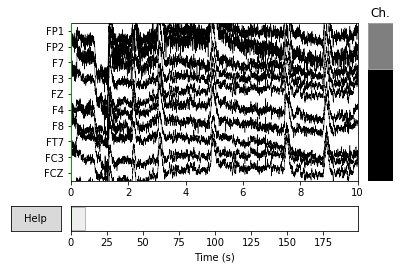

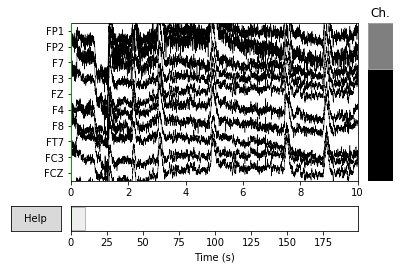

In [36]:
raw = mne.io.read_raw_fif(name)
print(raw)
raw.plot(n_channels=10)

In [59]:
# Band-pass FIR filter
#The sample frequency in Hz
sfreq = 1000
#Low cut-off frequency in Hz
l_freq = 1
#high cut-off frequency in Hz
h_freq = 45
#
filter_length = '1s'
#
fir_window = 'hann'
#
print(raw[:5,:5])
data_filted = raw.load_data().filter(l_freq=l_freq, h_freq=h_freq, fir_design='firwin')
#data_filted = mne.filter.filter_data(
 #   raw,sfreq=sfreq, l_freq=l_freq, h_freq=h_freq, 
  #  fir_window=fir_window, filter_length=filter_length,)
print(raw[:5,:5])
print(data_filted[:5,:5])
#

(array([[ -3.04931861e-20,   3.50746680e-07,   6.81994338e-07,
          9.74863216e-07,   1.21171313e-06],
       [ -3.38813179e-20,   2.49495798e-06,   4.84148638e-06,
          6.90015784e-06,   8.54897313e-06],
       [ -6.77626358e-21,  -1.36058643e-08,  -4.24035370e-08,
         -1.01256094e-07,  -2.04336069e-07],
       [ -1.69406589e-20,  -2.09361166e-06,  -4.15777765e-06,
         -6.16331450e-06,  -8.08159964e-06],
       [ -1.52465931e-20,  -1.59954626e-06,  -3.18809954e-06,
         -4.75427675e-06,  -6.28597399e-06]]), array([ 0.   ,  0.001,  0.002,  0.003,  0.004]))
Setting up band-pass filter from 1 - 45 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 11.2 Hz
Filter length of 3301 samples (3.301 sec) selected
(array([[ -2.71050543e-20,   3.61038359e-07,   7.01315961e-07,
          1.00079524e-06,   1.24087753e-06],
       [ -3.72694497e-20,   2.51792221e-06,   4.88464263e-06,
          6.95821329e-06,   8.61459464e-06],
       [ -6.77626358e-21,  

In [156]:
raw.info

<Info | 19 non-empty fields
    bads : list | 0 items
    buffer_size_sec : float | 10.0
    ch_names : list | FP1, FP2, F7, F3, FZ, F4, F8, FT7, FC3, ...
    chs : list | 34 items (EEG: 31, EOG: 2, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    description : str | 0 items
    dev_head_t : Transform | 3 items
    dig : list | 34 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 500.0 Hz
    nchan : int | 34
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 1000.0 Hz
    subject_info : dict | 5 items
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    dev_ctf_t : NoneType
    experimenter : NoneType
    file_id : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_date : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    x

Effective window size : 1.000 (s)
(33, 501)
(501,)


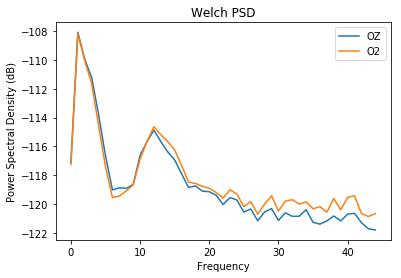

In [157]:
#PSD
n_fft = 1000
n_overlap = 0.5*n_fft
picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=True)
psds, freqs = mne.time_frequency.psd_welch(raw,n_fft=n_fft,
                                           n_overlap=n_overlap,
                                          picks=picks)
print(psds.shape)
print(freqs.shape)
f, ax = plt.subplots()
psds = 10 * np.log10(psds)
psds_mean = psds.mean(0)
psds_std = psds.std(0)

fmax = 45
ax.plot(freqs[:fmax], psds[28:30,:fmax].T, )
#ax.fill_between(freqs, psds_mean - psds_std, psds_mean + psds_std,
 #               color='k', alpha=.5)
ax.set(title='Welch PSD', xlabel='Frequency',
       ylabel='Power Spectral Density (dB)')
plt.legend(raw.ch_names[28:30])
plt.show()

90 events found
Events id: [1 2 3]
Found 90 events, first five:
[[ 1597     0     1]
 [ 9319     0     2]
 [ 9663     0     3]
 [ 9722     0     1]
 [12050     0     2]]


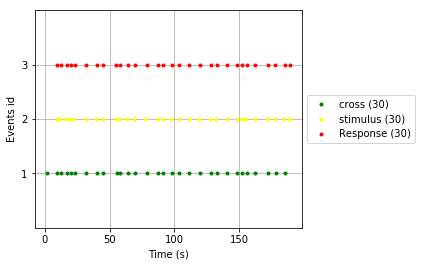

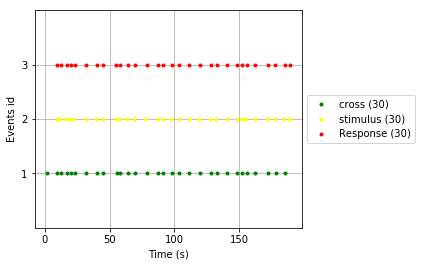

In [60]:
#find events
events = mne.find_events(raw)
print('Found %s events, first five:' % len(events))
# The first column corresponds to sample number,
# The third column is the trigger id (amplitude of the pulse).
print(events[:5])
# Plot the events to get an idea of the paradigm
# Specify colors and an event_id dictionary for the legend.
event_id = {'cross': 1, 'stimulus': 2,
            'Response': 3,}
color = {1: 'green', 2: 'yellow', 3: 'red',}

mne.viz.plot_events(events, raw.info['sfreq'], raw.first_samp, color=color,
                    event_id=event_id)

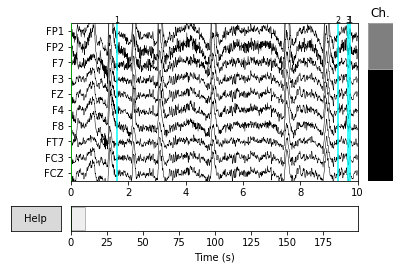

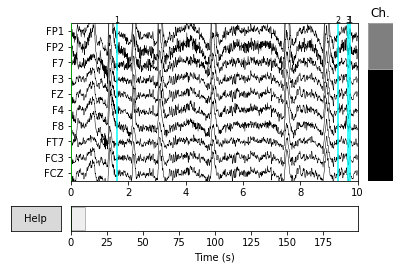

In [61]:
raw.plot(events=events, n_channels=10, )

90 matching events found
0 projection items activated
Loading data for 90 events and 701 original time points ...
0 bad epochs dropped
Loading data for 20 events and 701 original time points ...


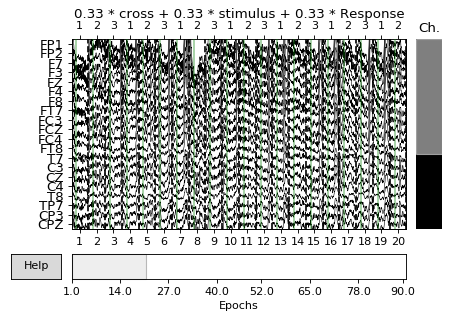

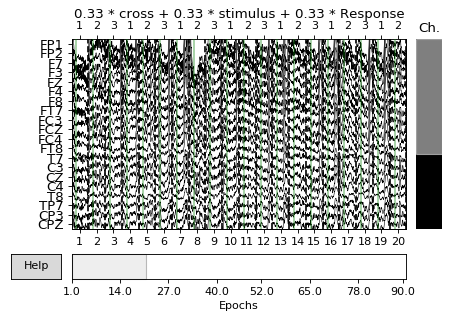

In [62]:
tmin, tmax = -0.2, 0.5
event_id = {'cross': 1, 'stimulus': 2,
            'Response': 3,}
# Only pick MEG and EOG channels.
picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=True)
baseline = (None, 0.0)
reject = {}
epochs = mne.Epochs(raw, events=events, event_id=event_id, tmin=tmin,
                    tmax=tmax, baseline=baseline, reject=reject, picks=picks)
epochs.plot(block=False)

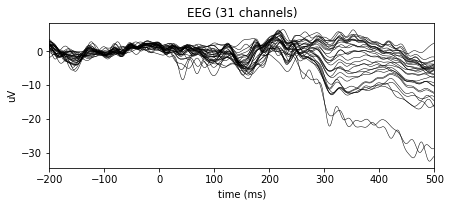

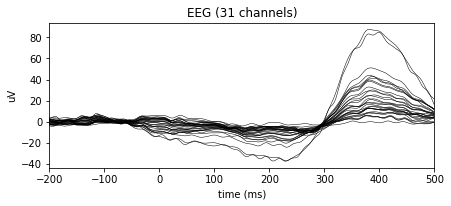

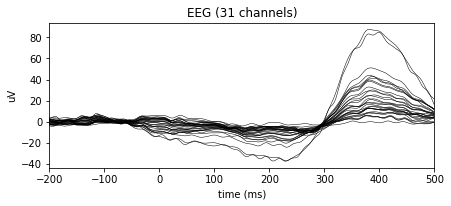

In [63]:
picks = mne.pick_types(epochs.info, eeg=True, eog=False)
evoked_left = epochs['stimulus'].average(picks=picks)
evoked_right = epochs['Response'].average(picks=picks)
evoked_left.plot()
evoked_right.plot()

In [171]:
n_block = 9

homepath = 'D:/data/EEG/jqx/'
montage = mne.channels.read_montage('standard_1020')
eog = ['HEOG','VEOG'] #set EOG channels
#Low cut-off frequency in Hz
l_freq = 1
#high cut-off frequency in Hz
h_freq = 45
n_fft = 1000
n_overlap = 0.5*n_fft
picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=True)

    #res[:,:]
psd = np.zeros((33,501,n_block))  
for b in np.arange(n_block)+1:
    #print(b)
    filename = 'p'+str(b)+'.cnt'
    filepath = homepath + filename
    raw = mne.io.read_raw_cnt(filepath,montage, eog=eog, date_format='dd/mm/yy’' )
    raw.load_data().filter(l_freq=l_freq, h_freq=h_freq, fir_design='firwin')

    psds,f = mne.time_frequency.psd_welch(raw,n_fft=n_fft, n_overlap=n_overlap,picks=picks)
    psd[:,:,b-1] = psds

    #raw.plot()


  Could not parse meas date from the header. Setting to None.


<ipython-input-171-bc63c1db74f4>:20: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = mne.io.read_raw_cnt(filepath,montage, eog=eog, date_format='dd/mm/yy’' )


Reading 0 ... 198679  =      0.000 ...   198.679 secs...
Setting up band-pass filter from 1 - 45 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 11.2 Hz
Filter length of 3301 samples (3.301 sec) selected
Effective window size : 1.000 (s)
  Could not parse meas date from the header. Setting to None.


<ipython-input-171-bc63c1db74f4>:20: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = mne.io.read_raw_cnt(filepath,montage, eog=eog, date_format='dd/mm/yy’' )


Reading 0 ... 209679  =      0.000 ...   209.679 secs...
Setting up band-pass filter from 1 - 45 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 11.2 Hz
Filter length of 3301 samples (3.301 sec) selected
Effective window size : 1.000 (s)
  Could not parse meas date from the header. Setting to None.


<ipython-input-171-bc63c1db74f4>:20: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = mne.io.read_raw_cnt(filepath,montage, eog=eog, date_format='dd/mm/yy’' )


Reading 0 ... 190759  =      0.000 ...   190.759 secs...
Setting up band-pass filter from 1 - 45 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 11.2 Hz
Filter length of 3301 samples (3.301 sec) selected
Effective window size : 1.000 (s)
  Could not parse meas date from the header. Setting to None.
Reading 0 ... 190999  =      0.000 ...   190.999 secs...


<ipython-input-171-bc63c1db74f4>:20: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = mne.io.read_raw_cnt(filepath,montage, eog=eog, date_format='dd/mm/yy’' )


Setting up band-pass filter from 1 - 45 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 11.2 Hz
Filter length of 3301 samples (3.301 sec) selected
Effective window size : 1.000 (s)
  Could not parse meas date from the header. Setting to None.
Reading 0 ... 197279  =      0.000 ...   197.279 secs...


<ipython-input-171-bc63c1db74f4>:20: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = mne.io.read_raw_cnt(filepath,montage, eog=eog, date_format='dd/mm/yy’' )


Setting up band-pass filter from 1 - 45 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 11.2 Hz
Filter length of 3301 samples (3.301 sec) selected
Effective window size : 1.000 (s)
  Could not parse meas date from the header. Setting to None.
Reading 0 ... 216319  =      0.000 ...   216.319 secs...


<ipython-input-171-bc63c1db74f4>:20: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = mne.io.read_raw_cnt(filepath,montage, eog=eog, date_format='dd/mm/yy’' )


Setting up band-pass filter from 1 - 45 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 11.2 Hz
Filter length of 3301 samples (3.301 sec) selected
Effective window size : 1.000 (s)
  Could not parse meas date from the header. Setting to None.
Reading 0 ... 182879  =      0.000 ...   182.879 secs...


<ipython-input-171-bc63c1db74f4>:20: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = mne.io.read_raw_cnt(filepath,montage, eog=eog, date_format='dd/mm/yy’' )


Setting up band-pass filter from 1 - 45 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 11.2 Hz
Filter length of 3301 samples (3.301 sec) selected
Effective window size : 1.000 (s)
  Could not parse meas date from the header. Setting to None.
Reading 0 ... 204279  =      0.000 ...   204.279 secs...


<ipython-input-171-bc63c1db74f4>:20: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = mne.io.read_raw_cnt(filepath,montage, eog=eog, date_format='dd/mm/yy’' )


Setting up band-pass filter from 1 - 45 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 11.2 Hz
Filter length of 3301 samples (3.301 sec) selected
Effective window size : 1.000 (s)
  Could not parse meas date from the header. Setting to None.
Reading 0 ... 213879  =      0.000 ...   213.879 secs...


<ipython-input-171-bc63c1db74f4>:20: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = mne.io.read_raw_cnt(filepath,montage, eog=eog, date_format='dd/mm/yy’' )


Setting up band-pass filter from 1 - 45 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 11.2 Hz
Filter length of 3301 samples (3.301 sec) selected
Effective window size : 1.000 (s)


In [174]:
np.save('D:/data/EEG/psd.npy',psd)
b = np.load('D:/data/EEG/psd.npy')
print(b[:3,:3,:3])

[[[  4.83346975e-10   1.74297557e-10   1.85327657e-10]
  [  2.13678963e-09   1.19897910e-09   1.29226957e-09]
  [  1.39581131e-09   1.14525067e-09   1.12553489e-09]]

 [[  1.56548075e-10   1.64225384e-10   1.84155638e-10]
  [  1.99886033e-09   1.11984257e-09   1.31063689e-09]
  [  1.93270059e-09   1.06229543e-09   1.13641417e-09]]

 [[  4.77389067e-11   6.06804097e-11   6.92613246e-11]
  [  3.14609471e-10   4.30398036e-10   4.61547038e-10]
  [  3.12352494e-10   3.93964303e-10   3.87992848e-10]]]


In [164]:
bb.shape

AttributeError: 'tuple' object has no attribute 'shape'

In [149]:
a = np.arange(9).reshape(3,3)
b = np.arange(9).reshape(3,3)

c = np.array([a,b])
c.shape
d = a;
d =np.expand_dims(a,axis=2)
d.shape
#d[:,:,1] = b
np.column_stack((a[:,newaxis],b[:,newaxis]))

NameError: name 'newaxis' is not defined

In [153]:
c = np.zeros((3,3,2))
c[:,:,0] = a
c[:,:,1] = b
print(c[...,0])
print(c[...,1])

[[ 0.  1.  2.]
 [ 3.  4.  5.]
 [ 6.  7.  8.]]
[[ 0.  1.  2.]
 [ 3.  4.  5.]
 [ 6.  7.  8.]]


  Could not parse meas date from the header. Setting to None.
Could not define the number of bytes automatically. Defaulting to 2.


<ipython-input-2-8539edeae95f>:3: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = mne.io.read_raw_cnt(path,montage)
D:\anaconda\lib\site-packages\mne\io\cnt\cnt.py:185: RuntimeWarning: overflow encountered in long_scalars
  data_size // (n_samples * n_channels) not in [2, 4]):
<ipython-input-2-8539edeae95f>:3: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = mne.io.read_raw_cnt(path,montage)


The following EEG sensors did not have a position specified in the selected montage: ['M1', 'M2', 'PO5', 'PO6', 'CB1', 'CB2', 'VEO', 'HEO', 'EKG', 'EMG']. Their position has been left untouched.


<ipython-input-2-8539edeae95f>:3: RuntimeWarning: The following EEG sensors did not have a position specified in the selected montage: ['M1', 'M2', 'PO5', 'PO6', 'CB1', 'CB2', 'VEO', 'HEO', 'EKG', 'EMG']. Their position has been left untouched.
  raw = mne.io.read_raw_cnt(path,montage)


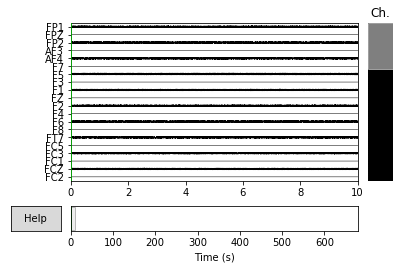

OSError: Destination file exists. Please use option "overwrite=True" to force overwriting.

In [2]:
path = 'D:/2016毕设/sh-ly2.cnt'
montage = mne.channels.read_montage('biosemi64')
raw = mne.io.read_raw_cnt(path,montage)
#raw.plot()
#print(raw.info)
name = '1_raw.fif'
raw.save(name)




Opening raw data file C:\Users\acer\my pie\MNE\1_raw.fif...
    Range : 0 ... 99999 =      0.000 ...    99.999 secs
Ready.


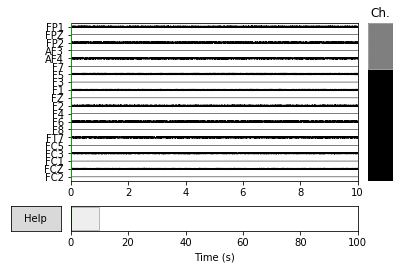

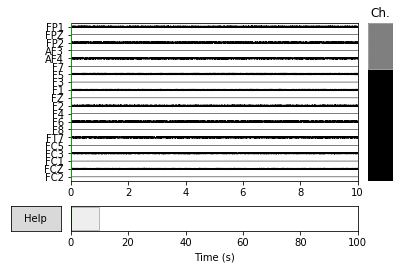

In [15]:
raw = mne.io.read_raw_fif(name)
raw.plot()